In [1]:
""" Exxoff Case Study One-Way Range Sensitivity Analysis"""
from DecisionAnalysisPy import OneWayRangeSensit
import numpy_financial as npf

In [2]:
# Uncertain variable names and their [low, base, high] values
v_data = { 'c' : [0.65, 0.88, 1.11],
           'p' : [0.62, 0.95, 1.28],
           'f' : [0.42, 0.48, 0.54],
           'L' : [ 14,   20,   26 ] }    

# Fixed parameters name and value
f_data = {'marr' : 0.1 }

In [3]:
# Objective functions, one for each alternative. 
# Arguments must be in the same order as above

def npv_1(c, p, f, L, marr):
    return -npf.pv(marr, 5, 0, -7-npf.pv(marr, L, 50*f*(1-p*c)))*1000
def npv_2(c, p, f, L, marr):
    return -npf.pv(marr, 5, 0, -7)*1000
def npv_3(c, p, f, L, marr):
    return 0

# The alternative names and their objective functions 
obj_fns = {"Invest in R&D and Market"       : npv_1,
           "Invest in R&D and Don't market" : npv_2,
           "Don't invest in R&D"            : npv_3 }

# Label for the objective function outputs
obj_label = 'NPV($K)'

In [4]:
# Perform one-way range sensitivity analysis
exoff = OneWayRangeSensit(v_data, f_data, obj_fns, obj_label)

In [5]:
# Show variable and objective base values
exoff.base_values()


Variable base values:
  c = 0.88
  p = 0.95
  f = 0.48
  L = 20.00
Objective base values:
  Invest in R&D and Market =  16,460.24
  Invest in R&D and Don't market =  -4,346.45
  Don't invest in R&D =  0.00


{'Invest in R&D and Market': 16460.243525945018,
 "Invest in R&D and Don't market": -4346.4492614140845,
 "Don't invest in R&D": 0}

In [6]:
# Show sensitivity range tables
exoff.sensit_table()


One-Way Range Sensitivty Tables:

Invest in R&D and Market:
  c         :       0.65       0.88       1.11 |    44,181.36   -11,260.87 |   55,442.22
  p         :       0.62       0.95       1.28 |    53,303.31   -20,382.83 |   73,686.14
  f         :       0.42       0.48       0.54 |    13,859.41    19,061.08 |    5,201.67
  L         :      14.00      20.00      26.00 |    13,657.34    18,042.41 |    4,385.07

Invest in R&D and Don't market:
  c         :       0.65       0.88       1.11 |    -4,346.45    -4,346.45 |        0.00
  p         :       0.62       0.95       1.28 |    -4,346.45    -4,346.45 |        0.00
  f         :       0.42       0.48       0.54 |    -4,346.45    -4,346.45 |        0.00
  L         :      14.00      20.00      26.00 |    -4,346.45    -4,346.45 |        0.00

Don't invest in R&D:
  c         :       0.65       0.88       1.11 |         0.00         0.00 |        0.00
  p         :       0.62       0.95       1.28 |         0.00         0.00 |       

{'Invest in R&D and Market': {'c': [44181.35556276186,
   -11260.868510871835,
   -55442.2240736337],
  'p': [53303.314168927216, -20382.827117037203, -73686.14128596442],
  'f': [13859.40692752513, 19061.080124364904, 5201.673196839774],
  'L': [13657.339495260941, 18042.40977970883, 4385.070284447887]},
 "Invest in R&D and Don't market": {'c': [-4346.4492614140845,
   -4346.4492614140845,
   0.0],
  'p': [-4346.4492614140845, -4346.4492614140845, 0.0],
  'f': [-4346.4492614140845, -4346.4492614140845, 0.0],
  'L': [-4346.4492614140845, -4346.4492614140845, 0.0]},
 "Don't invest in R&D": {'c': [0, 0, 0],
  'p': [0, 0, 0],
  'f': [0, 0, 0],
  'L': [0, 0, 0]}}

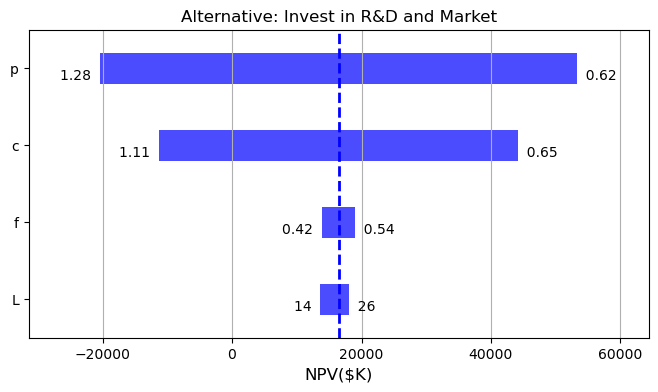

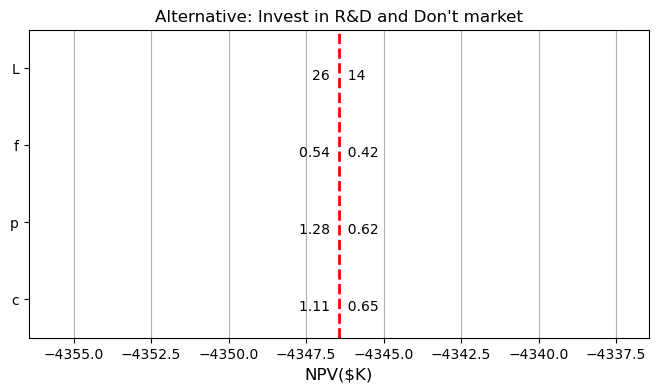

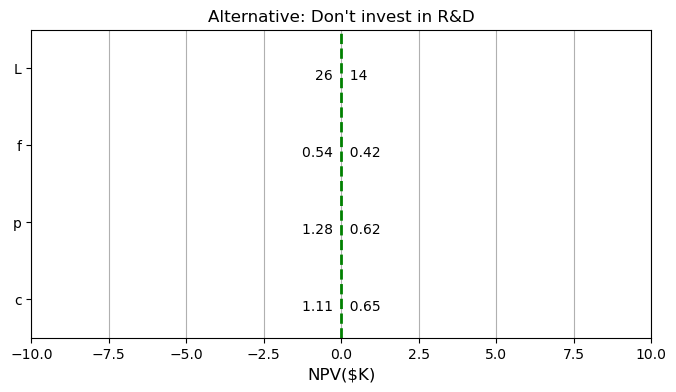

In [7]:
# Show individual tornado diagrams
exoff.tornados()

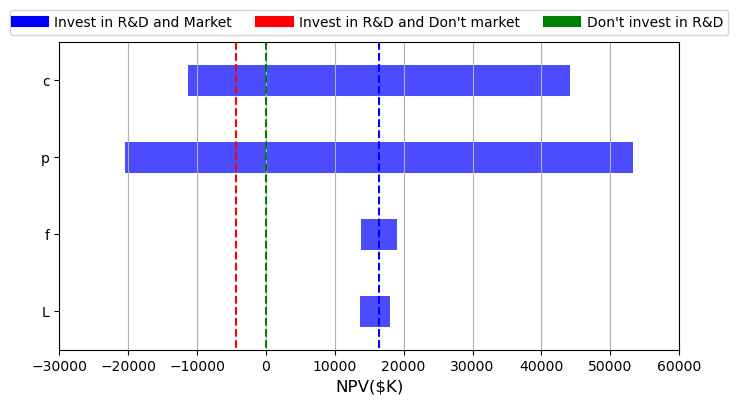

In [8]:
# Show combined tornados
exoff.combined_tornados(xlim=(-30000,60000), annotate=False)

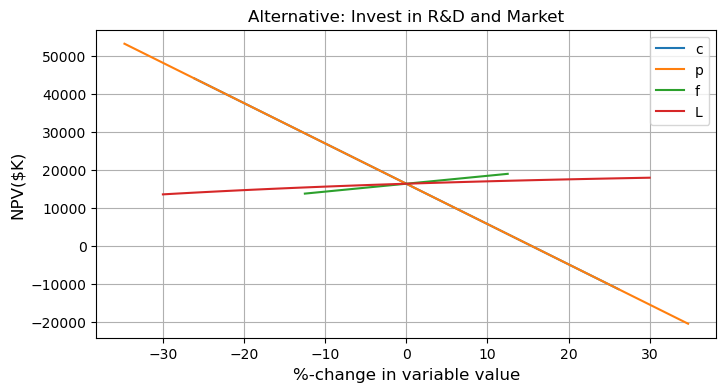

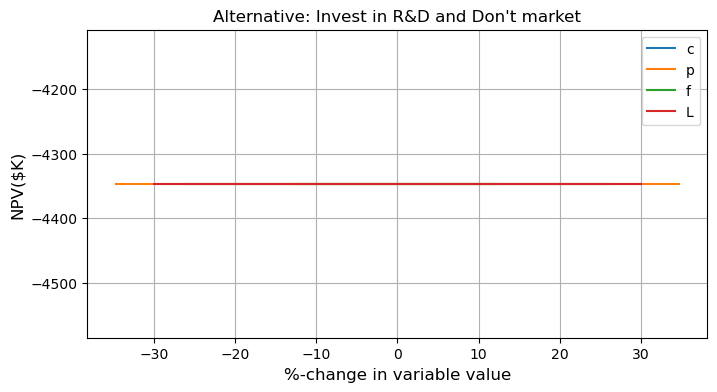

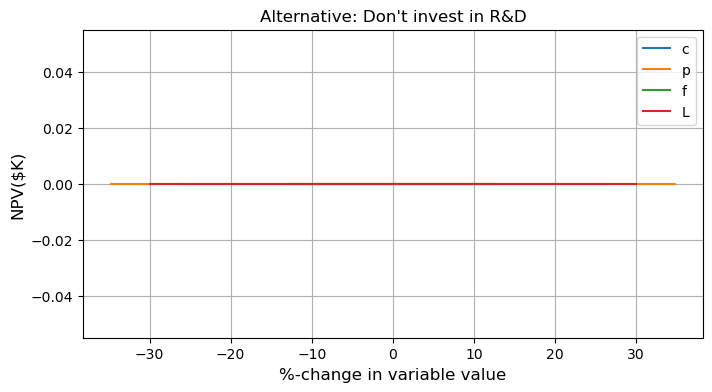

In [9]:
# Show individual spider diagrams
exoff.spiders()

In [10]:
# Plot combined tornados for the 2 initial alterntives
def npv_invest(c, p, f, L, marr):
    return max(npv_1(c, p, f, L, marr), npv_2(c, p, f, L, marr)) 
    # return -npf.pv(0.1, 5, 0, -7+max(0,-npf.pv(0.1, L, 50*f*(1-p*c))))

init_objs = { "Invest in R&D"       : npv_invest,
              "Don't invest in R&D" : npv_3 }

In [11]:
# Perform one-way range sensitivity analysis
ex_init = OneWayRangeSensit(v_data, f_data, init_objs, obj_label)

In [12]:
ex_init.base_values()
# Show sensitivity range tables


Variable base values:
  c = 0.88
  p = 0.95
  f = 0.48
  L = 20.00
Objective base values:
  Invest in R&D =  16,460.24
  Don't invest in R&D =  0.00


{'Invest in R&D': 16460.243525945018, "Don't invest in R&D": 0}

In [13]:
ex_init.sensit_table()
# Show individual tornado diagrams


One-Way Range Sensitivty Tables:

Invest in R&D:
  c         :       0.65       0.88       1.11 |    44,181.36    -4,346.45 |   48,527.80
  p         :       0.62       0.95       1.28 |    53,303.31    -4,346.45 |   57,649.76
  f         :       0.42       0.48       0.54 |    13,859.41    19,061.08 |    5,201.67
  L         :      14.00      20.00      26.00 |    13,657.34    18,042.41 |    4,385.07

Don't invest in R&D:
  c         :       0.65       0.88       1.11 |         0.00         0.00 |        0.00
  p         :       0.62       0.95       1.28 |         0.00         0.00 |        0.00
  f         :       0.42       0.48       0.54 |         0.00         0.00 |        0.00
  L         :      14.00      20.00      26.00 |         0.00         0.00 |        0.00


{'Invest in R&D': {'c': [44181.35556276186,
   -4346.4492614140845,
   -48527.804824175946],
  'p': [53303.314168927216, -4346.4492614140845, -57649.7634303413],
  'f': [13859.40692752513, 19061.080124364904, 5201.673196839774],
  'L': [13657.339495260941, 18042.40977970883, 4385.070284447887]},
 "Don't invest in R&D": {'c': [0, 0, 0],
  'p': [0, 0, 0],
  'f': [0, 0, 0],
  'L': [0, 0, 0]}}

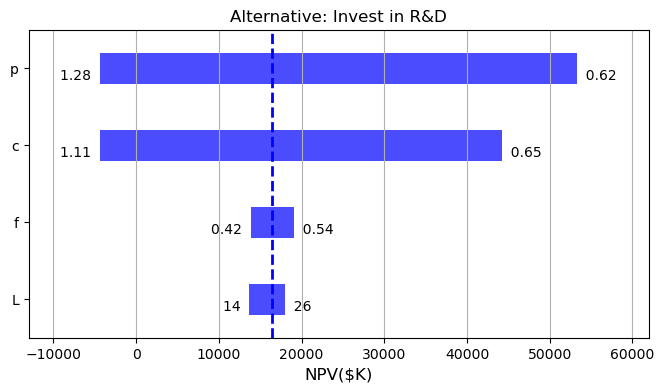

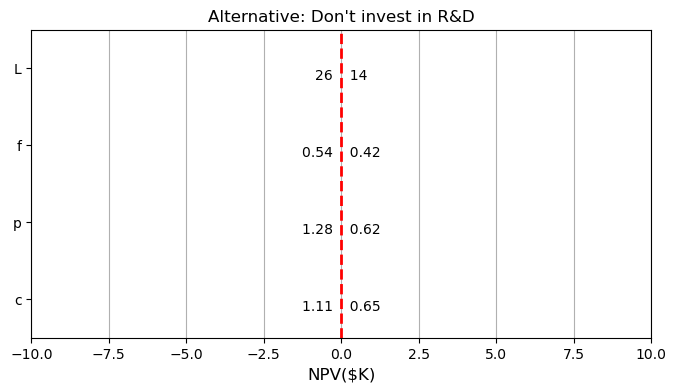

In [14]:
ex_init.tornados()
# Show combined tornados

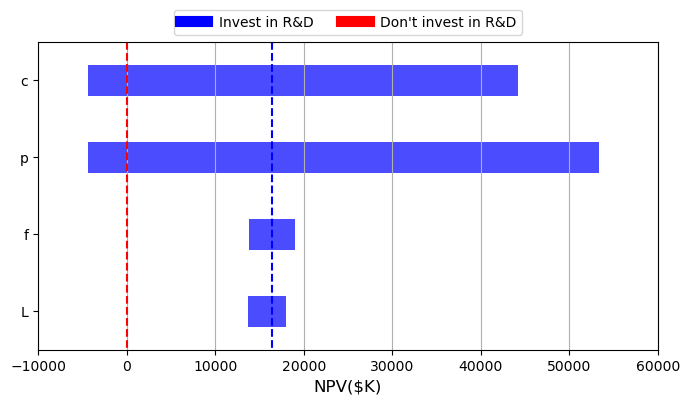

In [15]:
# Show combined tornados
ex_init.combined_tornados(xlim=(-10000,60000), annotate=False)

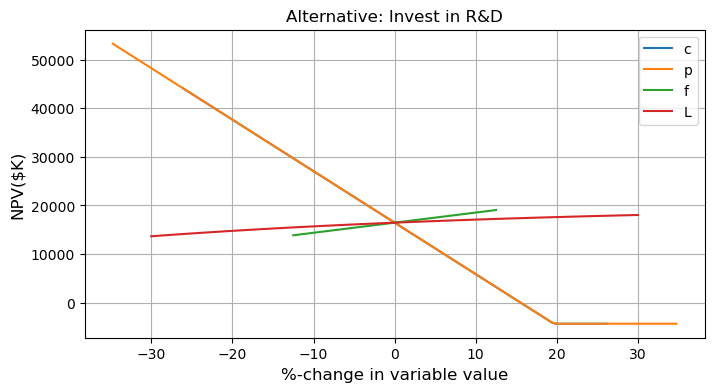

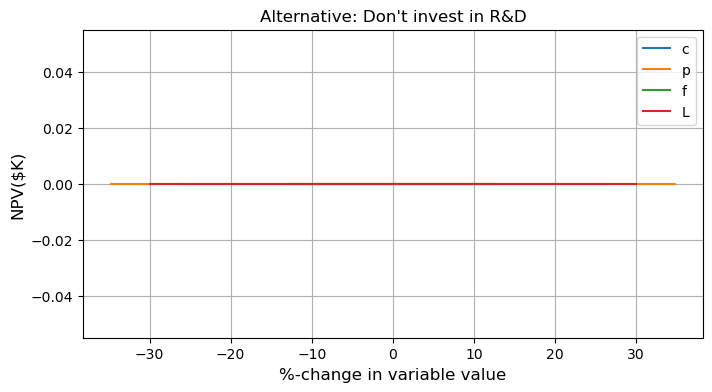

In [16]:
# Show individual spider diagrams
ex_init.spiders()